In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We use the embeddings of checkpoint model 5 to evaluate its performance on detecting if pairs of imgs belong to same artist or not based on cosine similarity distances.

In [2]:
distances_df = pd.read_csv("../cosine_similarity_exp5.csv")
distances_df.head(10)

index      image1      image2  sameArtist      dist
0      0  100005.jpg  100004.jpg       False  0.062867
1      1  100014.jpg  100004.jpg       False  0.078139
2      2  100014.jpg  100005.jpg       False  0.128353
3      3  100022.jpg  100004.jpg       False -0.060263
4      4  100022.jpg  100005.jpg       False  0.031180
5      5  100022.jpg  100014.jpg       False -0.010767
6      6  100028.jpg       0.jpg       False  0.066477
7      7  100035.jpg       0.jpg       False -0.000418
8      8  100035.jpg  100028.jpg       False  0.006296
9      9  100043.jpg  100039.jpg       False  0.139245

### Data distribution

In [3]:
distances_df['sameArtist'].value_counts()

False    21632562
True       283485
Name: sameArtist, dtype: int64

### Cosine Similarity measure

This chart shows the cosine similarity distances between embeddings of pairs that are not belonging to the same artist `sameArtist == False`

The optimum similarity distance between 2 images that are not similar should be -1 or near to that.

<AxesSubplot:>

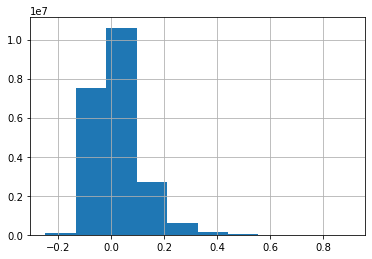

In [4]:
distances_df[distances_df['sameArtist']==False]['dist'].hist()

The chart shows the cosine similarity distances between embeddings of pairs that are belonging to the same artist `sameArtist == True`

The optimum similarity distance between 2 images that are not similar should be 1 or near to that.

<AxesSubplot:>

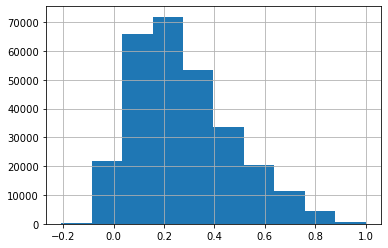

In [5]:
distances_df[distances_df['sameArtist']==True]['dist'].hist()

In [6]:
min_dist_same_artist = distances_df[distances_df['sameArtist']==True]['dist'].min()
max_dist_same_artist =distances_df[distances_df['sameArtist']==True]['dist'].max()


min_dist_not_same_artist = distances_df[distances_df['sameArtist']==False]['dist'].min()
max_dist_not_same_artist = distances_df[distances_df['sameArtist']==False]['dist'].max()


In [7]:
#max_dist_same_artist =distances_df[distances_df['sameArtist']==True]['dist'].nlargest(n=10)
max_dist_same_artist= distances_df[distances_df['sameArtist']==True]['dist'].nlargest(n=100).iloc[70]
max_dist_same_artist

0.9307944178581238

### Hard classification

In [8]:
max_distances = distances_df[(distances_df['sameArtist']==True) & (distances_df['dist']==max_dist_same_artist)]
max_distances

index     image1     image2  sameArtist      dist
5242749  5242749  52402.jpg  27720.jpg        True  0.930794

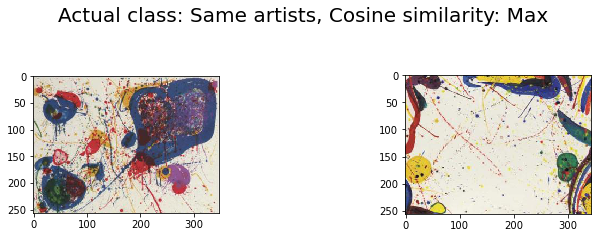

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(10,4))
fig.subplots_adjust(hspace = 0.5, wspace=1)
fig.suptitle(f'Actual class: Same artists, Cosine similarity: Max', fontsize=20)

image1 = plt.imread('../test_resized/52402.jpg')
image2 = plt.imread('../test_resized/27720.jpg')
axs[0].imshow(image1, interpolation='none')
axs[1].imshow(image2, interpolation='none')


In [10]:
distances_df[(distances_df['sameArtist']==True) & (distances_df['dist']==min_dist_same_artist)]

index     image1     image2  sameArtist     dist
14562765  14562765  83079.jpg  63770.jpg        True -0.20711

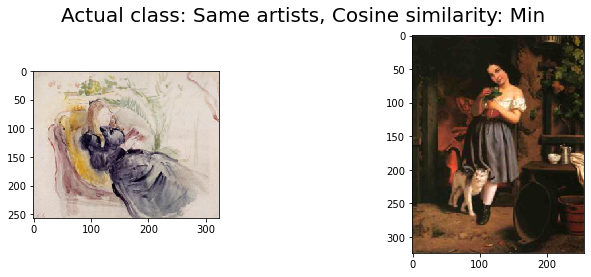

In [11]:
fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(10,4))
fig.subplots_adjust(hspace = 0.5, wspace=1)
fig.suptitle(f'Actual class: Same artists, Cosine similarity: Min', fontsize=20)

image1 = plt.imread('../test_resized/83079.jpg')
image2 = plt.imread('../test_resized/63770.jpg')
axs[0].imshow(image1, interpolation='none')
axs[1].imshow(image2, interpolation='none')


In [12]:
distances_df[(distances_df['sameArtist']==False) & (distances_df['dist']==min_dist_not_same_artist)]

index     image1     image2  sameArtist      dist
13901529  13901529  81286.jpg  75069.jpg       False -0.247481

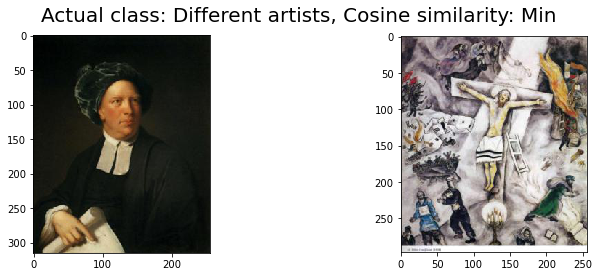

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(10,4))
fig.subplots_adjust(hspace = 0.5, wspace=1)
fig.suptitle(f'Actual class: Different artists, Cosine similarity: Min', fontsize=20)

image1 = plt.imread('../test_resized/81286.jpg')
image2 = plt.imread('../test_resized/75069.jpg')
axs[0].imshow(image1, interpolation='none')
axs[1].imshow(image2, interpolation='none')

In [14]:
distances_df[(distances_df['sameArtist']==False) & (distances_df['dist']==max_dist_not_same_artist)]

index     image1    image2  sameArtist      dist
951645  951645  26195.jpg  1239.jpg       False  0.900331

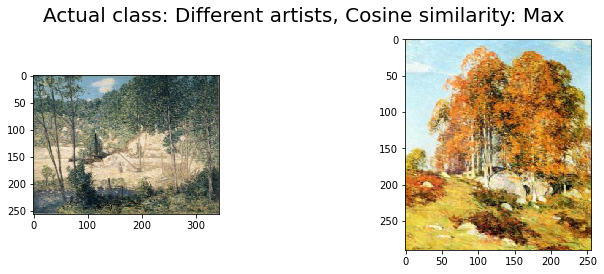

In [15]:
fig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(10,4))
fig.subplots_adjust(hspace = 0.5, wspace=1)
fig.suptitle(f'Actual class: Different artists, Cosine similarity: Max', fontsize=20)

image1 = plt.imread('../test_resized/26195.jpg')
image2 = plt.imread('../test_resized/1239.jpg')
axs[0].imshow(image1, interpolation='none')
axs[1].imshow(image2, interpolation='none')
